#  Reference template based classifier 
## Case 2: Mean vector and covariance matrix as reference template for a class

In [2]:
import numpy as np

# Function to load data from txt files
def load_data(file_path):
    data = np.loadtxt(file_path)
    features = data[:, :2]
    labels = data[:, 2].astype(int)
    return features, labels

# Function to calculate the mean and covariance for each class
def compute_class_templates(features, labels, class_labels=[1, 2, 3, 4]):
    mean_vectors = {}
    cov_matrices = {}
    
    for cls in class_labels:
        class_features = features[labels == cls]
        mean_vector = np.mean(class_features, axis=0)
        cov_matrix = np.cov(class_features, rowvar=False)
        
        mean_vectors[cls] = mean_vector
        cov_matrices[cls] = cov_matrix
    
    return mean_vectors, cov_matrices

# Mahalanobis distance calculation
def mahalanobis_distance(x, mean, cov):
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    distance = np.sqrt(diff.T @ inv_cov @ diff)
    return distance

# Prediction function
def predict(features, mean_vectors, cov_matrices, class_labels=[1, 2, 3, 4]):
    predictions = []
    
    for x in features:
        distances = [mahalanobis_distance(x, mean_vectors[cls], cov_matrices[cls]) for cls in class_labels]
        predictions.append(class_labels[np.argmin(distances)])
    
    return np.array(predictions)

# Load datasets
train_features, train_labels = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\combined_dataset_train.txt')
test_features, test_labels = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\combined_dataset_test.txt')

# Compute mean vectors and covariance matrices for each class using the training set
mean_vectors, cov_matrices = compute_class_templates(train_features, train_labels)
predicted_labels = predict(test_features, mean_vectors, cov_matrices)
accuracy = np.mean(predicted_labels == test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


### Decision region plot for all the classes together with the training data superposed 

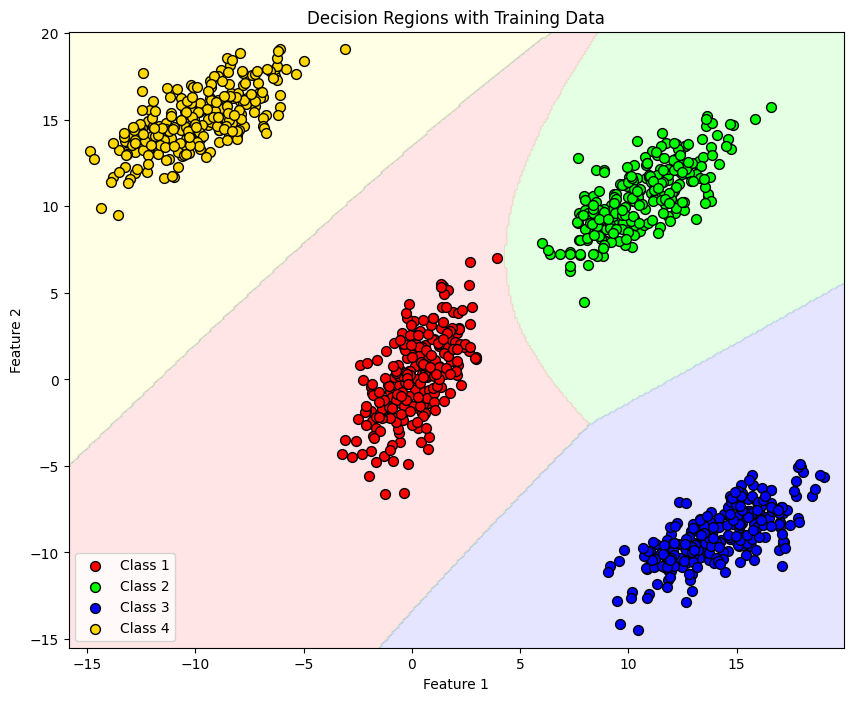

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Plotting decision regions
def plot_decision_regions(train_features, train_labels, mean_vectors, cov_matrices):
    x_min, x_max = train_features[:, 0].min() - 1, train_features[:, 0].max() + 1
    y_min, y_max = train_features[:, 1].min() - 1, train_features[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = predict(grid_points, mean_vectors, cov_matrices)
    grid_predictions = grid_predictions.reshape(xx.shape)
    
    # Define color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FFD700']
    
    # Plot decision boundary and regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=cmap_light)
    
    # Plot training points
    for idx, cls in enumerate([1, 2, 3, 4]):
        plt.scatter(train_features[train_labels == cls, 0], 
                    train_features[train_labels == cls, 1],
                    c=cmap_bold[idx], label=f'Class {cls}', edgecolor='k', s=50)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions with Training Data')
    plt.legend()
    plt.show()

# Compute mean vectors and covariance matrices for each class using the training set
mean_vectors, cov_matrices = compute_class_templates(train_features, train_labels)

# Plot decision regions with training data superposed
plot_decision_regions(train_features, train_labels, mean_vectors, cov_matrices)

### Decision region plot for all the classes together with the testing data superposed 

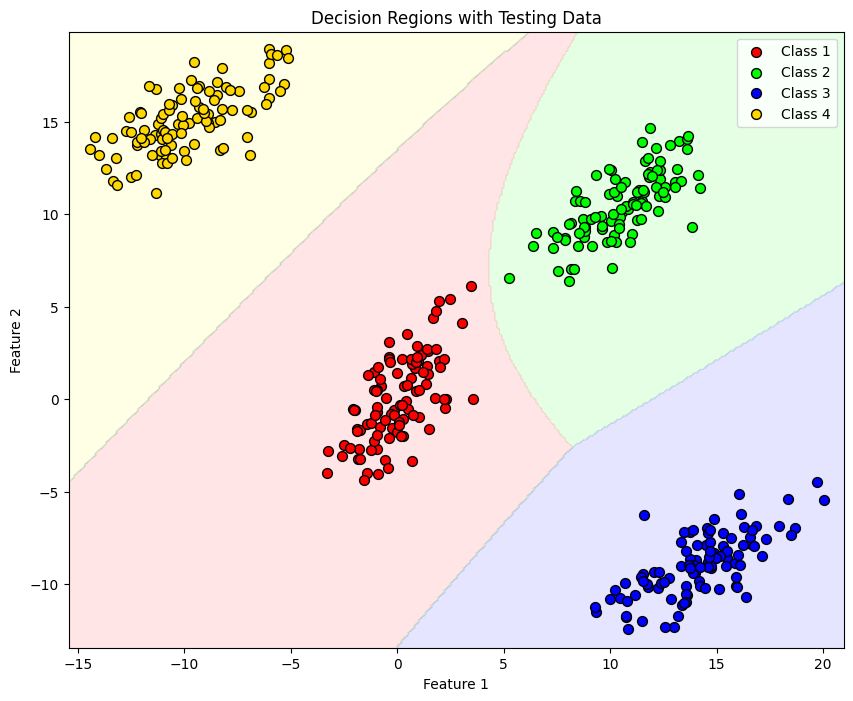

In [5]:
# Plotting decision regions with test data superimposed
def plot_decision_regions(test_features, test_labels, mean_vectors, cov_matrices):
    x_min, x_max = test_features[:, 0].min() - 1, test_features[:, 0].max() + 1
    y_min, y_max = test_features[:, 1].min() - 1, test_features[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = predict(grid_points, mean_vectors, cov_matrices)
    grid_predictions = grid_predictions.reshape(xx.shape)
    
    # Define color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FFD700']
    
    # Plot decision boundary and regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=cmap_light)
    
    # Plot test points
    for idx, cls in enumerate([1, 2, 3, 4]):
        plt.scatter(test_features[test_labels == cls, 0], 
                    test_features[test_labels == cls, 1],
                    c=cmap_bold[idx], label=f'Class {cls}', edgecolor='k', s=50)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions with Testing Data')
    plt.legend()
    plt.show()

# Compute mean vectors and covariance matrices for each class using the training set
mean_vectors, cov_matrices = compute_class_templates(train_features, train_labels)

# Plot decision regions with testing data superimposed
plot_decision_regions(test_features, test_labels, mean_vectors, cov_matrices)

### Decision region plot for every pair of classes with the respective training data superimposed

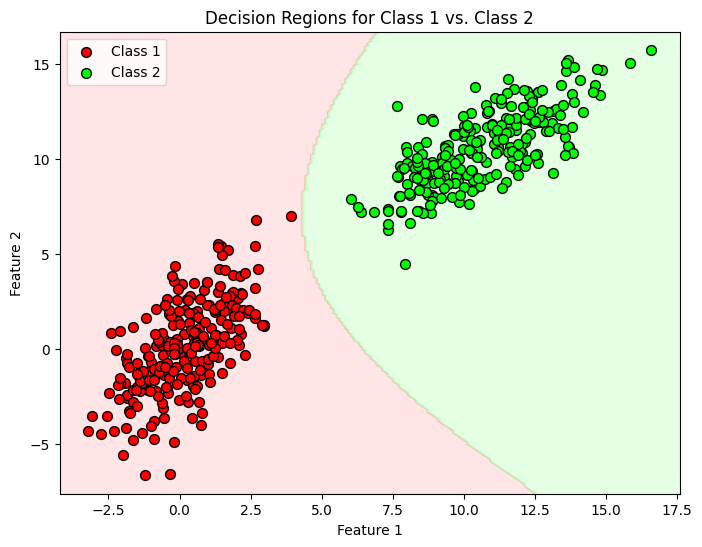

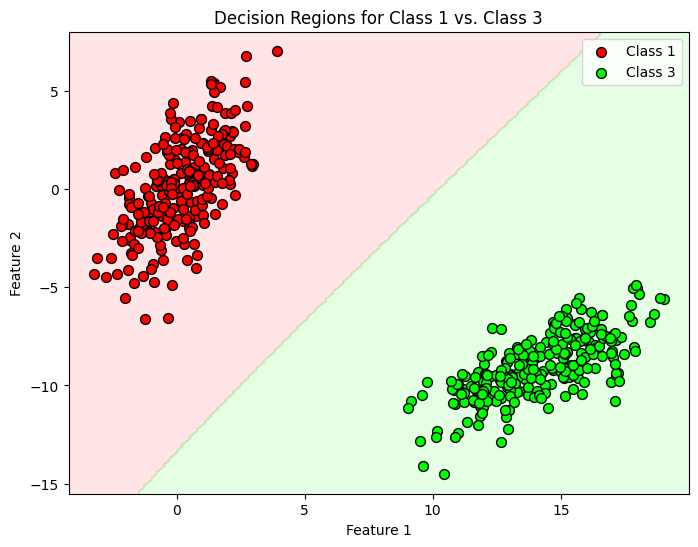

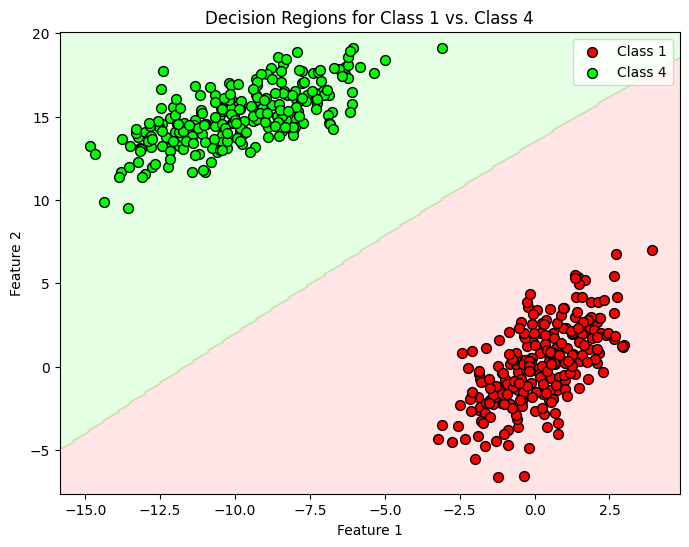

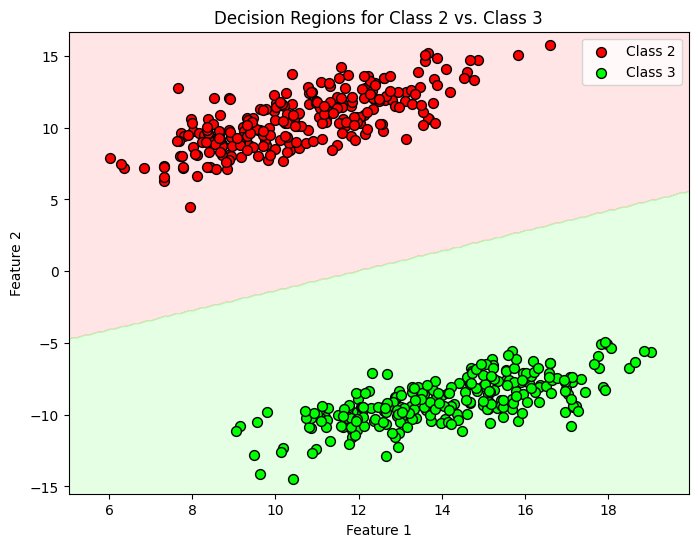

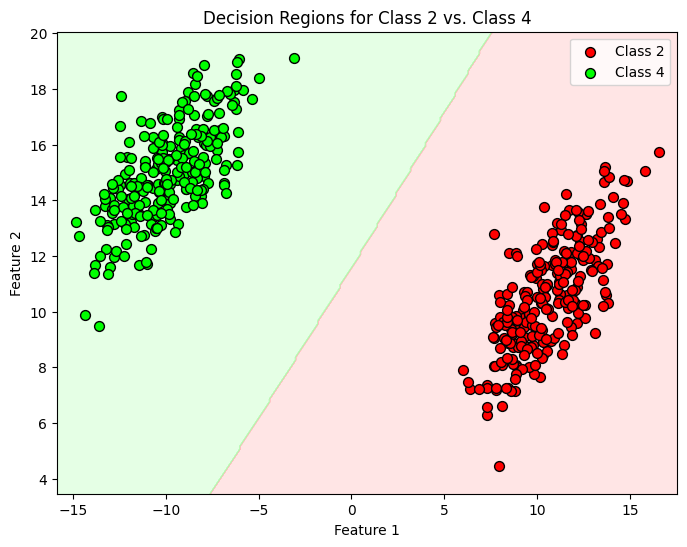

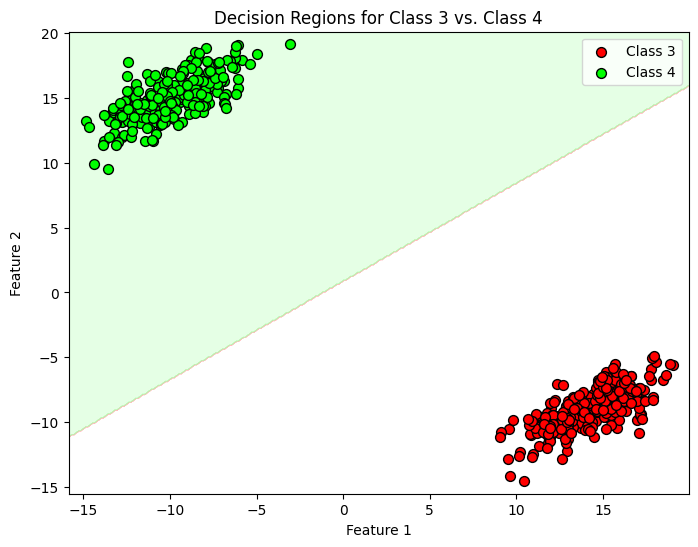

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import combinations

# Plot decision regions for a pair of classes
def plot_decision_regions_pair(train_features, train_labels, mean_vectors, cov_matrices, class_labels):
    # Filter features and labels to include only the selected class labels
    mask = np.isin(train_labels, class_labels)
    filtered_features = train_features[mask]
    filtered_labels = train_labels[mask]
    
    # Define the grid for plotting decision regions
    x_min, x_max = filtered_features[:, 0].min() - 1, filtered_features[:, 0].max() + 1
    y_min, y_max = filtered_features[:, 1].min() - 1, filtered_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = predict(grid_points, mean_vectors, cov_matrices, class_labels)
    grid_predictions = grid_predictions.reshape(xx.shape)
    
    # Define color map for the two classes
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ['#FF0000', '#00FF00']
    
    # Plot decision boundary and regions
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=cmap_light)
    
    # Plot training points for the pair of classes
    for idx, cls in enumerate(class_labels):
        plt.scatter(filtered_features[filtered_labels == cls, 0], 
                    filtered_features[filtered_labels == cls, 1],
                    c=cmap_bold[idx], label=f'Class {cls}', edgecolor='k', s=50)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions for Class {class_labels[0]} vs. Class {class_labels[1]}')
    plt.legend()
    plt.show()

# Loop through all pairs of classes and plot decision regions
class_labels = [1, 2, 3, 4]
for class_pair in combinations(class_labels, 2):
    # Compute mean vectors and covariance matrices for the current pair of classes
    mean_vectors, cov_matrices = compute_class_templates(train_features, train_labels, class_pair)
    # Plot decision regions with training data for the current pair of classes
    plot_decision_regions_pair(train_features, train_labels, mean_vectors, cov_matrices, class_pair)

### Evaluation Metrics

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Compute mean vectors and covariance matrices for each class using the training set
mean_vectors, cov_matrices = compute_class_templates(train_features, train_labels)

# Predict labels for the test set
predicted_labels = predict(test_features, mean_vectors, cov_matrices)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate precision, recall, and F-measure for each class
precision_per_class = precision_score(test_labels, predicted_labels, average=None, labels=[1, 2, 3, 4])
recall_per_class = recall_score(test_labels, predicted_labels, average=None, labels=[1, 2, 3, 4])
f_measure_per_class = f1_score(test_labels, predicted_labels, average=None, labels=[1, 2, 3, 4])

# Mean precision, recall, and F-measure across all classes
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f_measure = np.mean(f_measure_per_class)

# Create a DataFrame for displaying the results
results_df = pd.DataFrame({
    "Class": [1, 2, 3, 4, "Mean"],
    "Precision": np.append(precision_per_class, mean_precision),
    "Recall": np.append(recall_per_class, mean_recall),
    "F-measure": np.append(f_measure_per_class, mean_f_measure)
})

# Display accuracy
print(f'Overall Accuracy: {accuracy * 100:.2f}%\n')

# Display the table
print(results_df)

Overall Accuracy: 100.00%

  Class  Precision  Recall  F-measure
0     1        1.0     1.0        1.0
1     2        1.0     1.0        1.0
2     3        1.0     1.0        1.0
3     4        1.0     1.0        1.0
4  Mean        1.0     1.0        1.0


### Confusion Matrix

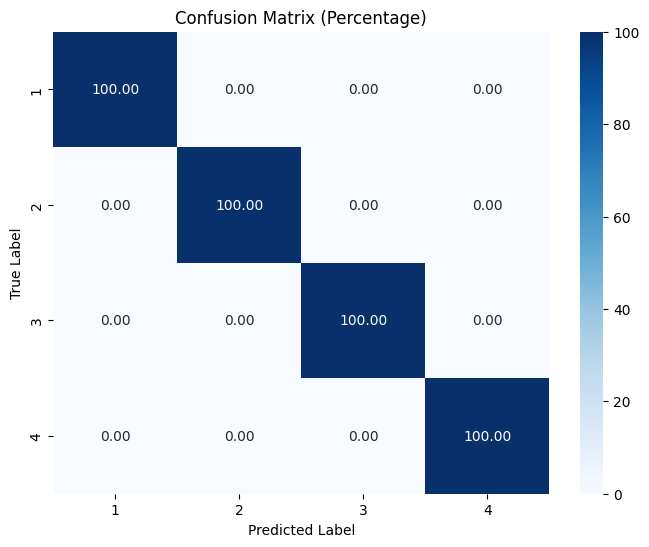

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels, labels=[1, 2, 3, 4])

# Convert confusion matrix to percentage
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()